In [1]:
import torch
import torch.nn as nn
import tiktoken

In [2]:
class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        # Uses a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])]
        )

        # Uses a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(cfg["emb_dim"], cfg["vocab_size"], bias=False)
    
    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        
        return logits

In [3]:
class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
    
    def forward(self, x):
        return x

In [4]:
class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
    
    def forward(self, x):
        return x

<div align="center">
  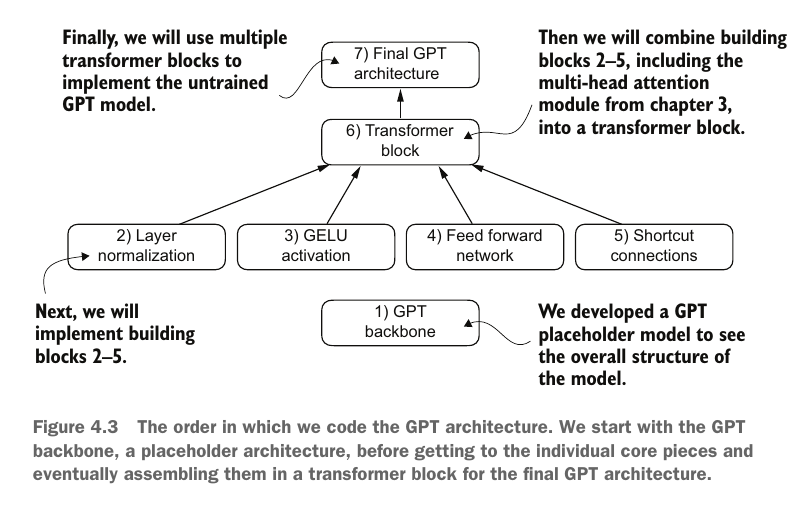
</div>

In [5]:
tokenizer = tiktoken.get_encoding("gpt2")
batch = []

txt1 = "Every effort moves you"
txt2 = "Every day holds a"

batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))

batch = torch.stack(batch, dim=0)

In [6]:
print("Batch: \n\n", batch)

Batch: 

 tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


In [7]:
%run GPT_CONFIG_124M.ipynb

In [8]:
torch.manual_seed(666)

model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)

In [9]:
print("Logits (Output) Shape =>", logits.shape)
print("Logits:\n\n", logits)

Logits (Output) Shape => torch.Size([2, 4, 50257])
Logits:

 tensor([[[-0.5633, -0.1546, -2.2828,  ...,  0.0066, -0.9877, -0.3055],
         [-0.5261,  0.0618,  0.2060,  ...,  2.8320,  2.1163, -1.1279],
         [ 0.0294,  1.6426,  0.1539,  ..., -0.1711,  0.6889,  1.7520],
         [ 1.2705,  0.8327,  0.1273,  ..., -0.5806, -0.6727,  0.8681]],

        [[-0.3159, -0.0491, -2.3028,  ..., -0.3032, -1.3389, -0.5256],
         [-0.6283,  0.6963, -1.0870,  ...,  0.6698,  0.3285, -0.6691],
         [-0.2855, -0.7498,  0.3045,  ...,  1.2731,  0.3089,  0.3075],
         [ 0.2570,  0.9196, -0.1823,  ..., -1.3218, -0.7884,  0.5525]]],
       grad_fn=<UnsafeViewBackward0>)
